In [2]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.metrics import roc_auc_score

%matplotlib inline

In [3]:
file=r'./Data/Data/census_income.csv'

ci_train=pd.read_csv(file)

In [4]:
ci_train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,Y
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
pd.crosstab(ci_train['education'],ci_train['education.num'])

education.num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,933,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1175,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,433,0,0,0,0,0,0,0,0
1st-4th,0,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,333,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,646,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,514,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1067,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,1382,0,0,0,0,0


In [6]:
ci_train.drop(['education'],axis=1,inplace=True)

In [9]:
ci_train['Y'].value_counts().index

Index([' <=50K', ' >50K'], dtype='object')

In [10]:
ci_train['Y'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [11]:
ci_train['Y'] = (ci_train['Y']==' >50K').astype(int)

In [12]:
cat_cols = ci_train.select_dtypes(['object']).columns

In [14]:
cat_cols

pandas.core.indexes.base.Index

In [19]:
for col in cat_cols:
    freqs=ci_train[col].value_counts()
freqs

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [20]:
for col in cat_cols:
    freqs=ci_train[col].value_counts()    # gives different categories in each column
    k=freqs.index[freqs>500][:-1]        #create n-1 dummies
    for cat in k:
        name=col+'_'+cat
        ci_train[name]=(ci_train[col]==cat).astype(int)
    del ci_train[col]
    print(col)
    

workclass
marital.status
occupation
relationship
race
sex
native.country


In [21]:
ci_train.shape

(32561, 39)

In [25]:
ci_train.isnull().sum()

age                                   0
fnlwgt                                0
education.num                         0
capital.gain                          0
capital.loss                          0
hours.per.week                        0
Y                                     0
workclass_ Private                    0
workclass_ Self-emp-not-inc           0
workclass_ Local-gov                  0
workclass_ ?                          0
workclass_ State-gov                  0
workclass_ Self-emp-inc               0
marital.status_ Married-civ-spouse    0
marital.status_ Never-married         0
marital.status_ Divorced              0
marital.status_ Separated             0
occupation_ Prof-specialty            0
occupation_ Craft-repair              0
occupation_ Exec-managerial           0
occupation_ Adm-clerical              0
occupation_ Sales                     0
occupation_ Other-service             0
occupation_ Machine-op-inspct         0
occupation_ ?                         0


In [30]:
x_train = ci_train.drop(['Y'],1)
y_train = ci_train['Y']

In [28]:
#z =ci_train

In [27]:
#z.drop(['Y'],1,1) # first 1 axis second 1 inplace

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_ Private,workclass_ Self-emp-not-inc,workclass_ Local-gov,workclass_ ?,...,relationship_ Husband,relationship_ Not-in-family,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ White,race_ Black,sex_ Male,native.country_ United-States,native.country_ Mexico
0,39,77516,13,2174,0,40,0,0,0,0,...,0,1,0,0,0,1,0,1,1,0
1,50,83311,13,0,0,13,0,1,0,0,...,1,0,0,0,0,1,0,1,1,0
2,38,215646,9,0,0,40,1,0,0,0,...,0,1,0,0,0,1,0,1,1,0
3,53,234721,7,0,0,40,1,0,0,0,...,1,0,0,0,0,0,1,1,1,0
4,28,338409,13,0,0,40,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
5,37,284582,14,0,0,40,1,0,0,0,...,0,0,0,0,1,1,0,0,1,0
6,49,160187,5,0,0,16,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
7,52,209642,9,0,0,45,0,1,0,0,...,1,0,0,0,0,1,0,1,1,0
8,31,45781,14,14084,0,50,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
9,42,159449,13,5178,0,40,1,0,0,0,...,1,0,0,0,0,1,0,1,1,0


In [32]:
from sklearn.model_selection import RandomizedSearchCV

In [33]:
params={ 
        'criterion':['entropy','gini'],
        'max_depth':[None,5,10,15,20,30,50,70],
            'min_samples_leaf':[1,2,5,10,15,20], 
            'min_samples_split':[2,5,10,15,20]
       }

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
clf=DecisionTreeClassifier()

In [36]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [39]:
random_search=RandomizedSearchCV(clf,cv=10,
                                 param_distributions=params,
                                 scoring='roc_auc',
                                 n_iter=10,verbose=1
                                    )

In [40]:
random_search

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'criterion': ['entropy', 'gini'], 'max_depth': [None, 5, 10, 15, 20, 30, 50, 70], 'min_samples_leaf': [1, 2, 5, 10, 15, 20], 'min_samples_split': [2, 5, 10, 15, 20]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=1)

In [41]:
random_search.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   40.2s finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'criterion': ['entropy', 'gini'], 'max_depth': [None, 5, 10, 15, 20, 30, 50, 70], 'min_samples_leaf': [1, 2, 5, 10, 15, 20], 'min_samples_split': [2, 5, 10, 15, 20]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=1)

In [42]:
random_search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=15,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [47]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.5f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [44]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: 0.904 (std: 0.00511)
Parameters: {'min_samples_split': 15, 'min_samples_leaf': 5, 'max_depth': 10, 'criterion': 'gini'}

Model with rank: 2
Mean validation score: 0.901 (std: 0.00529)
Parameters: {'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 10, 'criterion': 'entropy'}

Model with rank: 3
Mean validation score: 0.892 (std: 0.00563)
Parameters: {'min_samples_split': 15, 'min_samples_leaf': 20, 'max_depth': None, 'criterion': 'entropy'}

Model with rank: 4
Mean validation score: 0.887 (std: 0.00750)
Parameters: {'min_samples_split': 15, 'min_samples_leaf': 15, 'max_depth': 30, 'criterion': 'gini'}

Model with rank: 5
Mean validation score: 0.887 (std: 0.00777)
Parameters: {'min_samples_split': 20, 'min_samples_leaf': 15, 'max_depth': None, 'criterion': 'gini'}



In [48]:
random_search.cv_results_

C:\Users\AnujaAjay\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\AnujaAjay\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\AnujaAjay\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\AnujaAjay\Anaconda3\lib\site-packa

{'mean_fit_time': array([0.40008278, 0.33601513, 0.32240663, 0.35850205, 0.48913491,
        0.36737051, 0.29289858, 0.37188239, 0.34196224, 0.26741152]),
 'std_fit_time': array([0.04382664, 0.02387092, 0.02610353, 0.02573855, 0.04091041,
        0.02987397, 0.03997901, 0.01573665, 0.02785936, 0.02294095]),
 'mean_score_time': array([0.00855803, 0.00687611, 0.00633621, 0.00677335, 0.00634236,
        0.00651608, 0.0066797 , 0.00947597, 0.00680995, 0.00848212]),
 'std_score_time': array([0.00462499, 0.00184587, 0.00220535, 0.00158372, 0.0049443 ,
        0.00265201, 0.00354068, 0.0077433 , 0.00841254, 0.00808547]),
 'param_min_samples_split': masked_array(data=[5, 10, 15, 10, 2, 20, 10, 15, 20, 15],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[1, 10, 15, 5, 1, 10, 2, 20, 15, 5],
              mask=[False, False, False, False,

In [49]:
dtree=random_search.best_estimator_

In [50]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=15,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [51]:
x_train.columns

Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week', 'workclass_ Private', 'workclass_ Self-emp-not-inc',
       'workclass_ Local-gov', 'workclass_ ?', 'workclass_ State-gov',
       'workclass_ Self-emp-inc', 'marital.status_ Married-civ-spouse',
       'marital.status_ Never-married', 'marital.status_ Divorced',
       'marital.status_ Separated', 'occupation_ Prof-specialty',
       'occupation_ Craft-repair', 'occupation_ Exec-managerial',
       'occupation_ Adm-clerical', 'occupation_ Sales',
       'occupation_ Other-service', 'occupation_ Machine-op-inspct',
       'occupation_ ?', 'occupation_ Transport-moving',
       'occupation_ Handlers-cleaners', 'occupation_ Farming-fishing',
       'occupation_ Tech-support', 'relationship_ Husband',
       'relationship_ Not-in-family', 'relationship_ Own-child',
       'relationship_ Unmarried', 'relationship_ Wife', 'race_ White',
       'race_ Black', 'sex_ Male', 'native.country_ United

In [52]:
#visualize the best fit tree
dotfile = open("mytree.dot", 'w')

tree.export_graphviz(dtree,out_file=dotfile,
                     feature_names=x_train.columns,
                    class_names=["0","1"],
                     proportion=True)
dotfile.close()

In [53]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\AnujaAjay\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [54]:
clf = RandomForestClassifier()

In [55]:
param_dist = {"n_estimators":[100,200,300,500,700,1000],
              "max_features": [5,10,20,25,30,35],
              "bootstrap": [True, False],
              'class_weight':[None,'balanced'], 
                'criterion':['entropy','gini'],
                'max_depth':[None,5,10,15,20,30,50,70],
                'min_samples_leaf':[1,2,5,10,15,20], 
                'min_samples_split':[2,5,10,15,20]
                  }

In [56]:
x_train.shape

(32561, 38)

In [57]:
6*6*2*2*2*8*6*5

69120

In [58]:
n_iter_search = 2

random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search,scoring='roc_auc',cv=5)
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=2, n_jobs=None,
          param_distributions={'n_estimators': [100, 200, 300, 500, 700, 1000], 'max_features': [5, 10, 20, 25, 30, 35], 'bootstrap': [True, False], 'class_weight': [None, 'balanced'], 'criterion': ['entropy', 'gini'], 'max_depth': [None, 5, 10, 15, 20, 30, 50, 70], 'min_samples_leaf': [1, 2, 5, 10, 15, 20], 'min_samples_split': [2, 5, 10, 15, 20]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          ret

In [61]:
rfc =random_search.best_estimator_

In [60]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: 0.916 (std: 0.00326)
Parameters: {'n_estimators': 700, 'min_samples_split': 20, 'min_samples_leaf': 5, 'max_features': 30, 'max_depth': 50, 'criterion': 'entropy', 'class_weight': None, 'bootstrap': True}

Model with rank: 2
Mean validation score: 0.882 (std: 0.00237)
Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 35, 'max_depth': 70, 'criterion': 'gini', 'class_weight': 'balanced', 'bootstrap': False}



In [ ]:
#rf=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', max_depth=50, 
#                          max_features=10, max_leaf_nodes=None, min_impurity_split=1e-07, 
#                          min_samples_leaf=10, min_samples_split=20, min_weight_fraction_leaf=0.0, 
#                          n_estimators=300, n_jobs=1, oob_score=False, random_state=None, verbose=0, warm_start=False)

In [62]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=50, max_features=30, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=20,
            min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [63]:
rfc.feature_importances_

array([0.10791286, 0.1065539 , 0.14230379, 0.14765701, 0.04414119,
       0.05927453, 0.00782583, 0.00682766, 0.00360201, 0.00065964,
       0.00187746, 0.00230217, 0.23650799, 0.00621647, 0.00173934,
       0.0005853 , 0.00793456, 0.00487515, 0.01211012, 0.00384744,
       0.00468908, 0.00486844, 0.0028589 , 0.00068419, 0.00300966,
       0.00170033, 0.00310061, 0.00254839, 0.0382977 , 0.00240576,
       0.00160204, 0.00109158, 0.01179083, 0.00402313, 0.0023861 ,
       0.00596868, 0.00373169, 0.00048848])

In [64]:
feat_imp_df=pd.DataFrame({'features':x_train.columns,'importance':rfc.feature_importances_})

feat_imp_df.sort_values('importance',ascending=False)

,features,importance
12,marital.status_ Married-civ-spouse,0.236508
3,capital.gain,0.147657
2,education.num,0.142304
0,age,0.107913
1,fnlwgt,0.106554
5,hours.per.week,0.059275
4,capital.loss,0.044141
28,relationship_ Husband,0.038298
18,occupation_ Exec-managerial,0.012110
32,relationship_ Wife,0.011791


In [66]:
var_name='education.num'

preds=rfc.predict_proba(x_train)[:,1]

In [67]:
var_data=pd.DataFrame({'var':x_train[var_name],'response':preds})

C:\Users\AnujaAjay\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\AnujaAjay\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


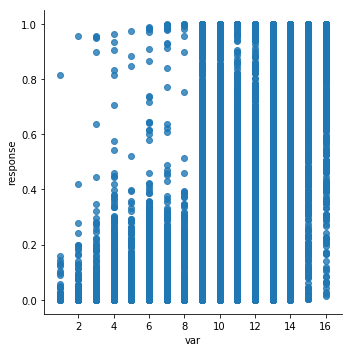

In [68]:
import seaborn as sns

sns.lmplot(x='var',y='response',data=var_data,fit_reg=False)

In [70]:
import statsmodels.api as sm
smooth_data=sm.nonparametric.lowess(var_data['response'],var_data['var'])

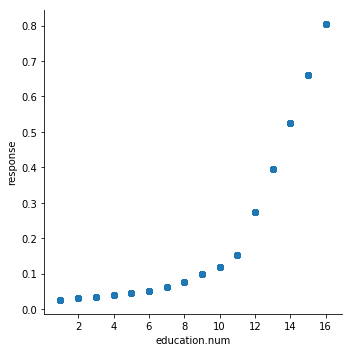

In [71]:
df=pd.DataFrame({'response':smooth_data[:,1],var_name:smooth_data[:,0]})

sns.lmplot(x=var_name,y='response',data=df,fit_reg=False)